<a href="https://colab.research.google.com/github/lillaszulyovszky/data-science-retreat-lectures/blob/main/LOTR_Word_to_Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -nc "https://raw.githubusercontent.com/wess/iotr/master/lotr.txt"

--2021-11-04 11:06:33--  https://raw.githubusercontent.com/wess/iotr/master/lotr.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3262595 (3.1M) [text/plain]
Saving to: ‘lotr.txt’

lotr.txt            100%[===================>]   3.11M  --.-KB/s    in 0.05s   

2021-11-04 11:06:33 (63.5 MB/s) - ‘lotr.txt’ saved [3262595/3262595]



In [2]:
import os
import logging
import os
import multiprocessing
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')
import numpy as np
import seaborn as sns
from scipy import spatial
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
class Sentences(object):
    def __init__(self):
        self.sentence_count = 0
        self.epoch = 0

    def __iter__(self):
        print(f"Epoch {self.epoch}")
        self.epoch += 1

        files = os.listdir(".")
        files = [file for file in files if file.endswith(".txt")]
        for fname in files:
            with open(fname) as f_input:
                corpus = f_input.read()
            raw_sentences = sent_tokenize(corpus)
            for sentence in raw_sentences:
                if len(sentence) > 0:
                    self.sentence_count += 1
                    yield simple_preprocess(sentence)

sentences = Sentences()

model = Word2Vec(
    sg=1,
    size=300,
    window=20,
    min_count=3,
    workers=multiprocessing.cpu_count())

model.build_vocab(sentences)

model.train(sentences=sentences, total_examples=model.corpus_count, epochs=4)

print("Done.")

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Done.


In [4]:
model.wv.vocab


{'special': <gensim.models.keyedvectors.Vocab at 0x7f8b7e7f3150>,
 'note': <gensim.models.keyedvectors.Vocab at 0x7f8b62cb6550>,
 'in': <gensim.models.keyedvectors.Vocab at 0x7f8b624aded0>,
 'this': <gensim.models.keyedvectors.Vocab at 0x7f8b622c4b90>,
 'several': <gensim.models.keyedvectors.Vocab at 0x7f8b622c4ad0>,
 'minor': <gensim.models.keyedvectors.Vocab at 0x7f8b622c47d0>,
 'most': <gensim.models.keyedvectors.Vocab at 0x7f8b622c4ed0>,
 'of': <gensim.models.keyedvectors.Vocab at 0x7f8b617d7e90>,
 'them': <gensim.models.keyedvectors.Vocab at 0x7f8b622c4cd0>,
 'noted': <gensim.models.keyedvectors.Vocab at 0x7f8b622c4990>,
 'by': <gensim.models.keyedvectors.Vocab at 0x7f8b617d7050>,
 'readers': <gensim.models.keyedvectors.Vocab at 0x7f8b617d7090>,
 'have': <gensim.models.keyedvectors.Vocab at 0x7f8b617d70d0>,
 'been': <gensim.models.keyedvectors.Vocab at 0x7f8b617d7110>,
 'corrected': <gensim.models.keyedvectors.Vocab at 0x7f8b617d7150>,
 'for': <gensim.models.keyedvectors.Vocab at 

In [6]:
model.wv.most_similar("friends", topn=20)

[('presents', 0.8747714757919312),
 ('fortune', 0.8729639053344727),
 ('willing', 0.8678945302963257),
 ('advice', 0.8571130633354187),
 ('affairs', 0.853834867477417),
 ('companion', 0.8438887596130371),
 ('friendship', 0.8435486555099487),
 ('lads', 0.8434921503067017),
 ('matters', 0.8434131145477295),
 ('interest', 0.841985821723938),
 ('prisoners', 0.841539740562439),
 ('labours', 0.8391526937484741),
 ('liking', 0.8390240669250488),
 ('remain', 0.838443398475647),
 ('visit', 0.8368040323257446),
 ('receive', 0.8364548683166504),
 ('spare', 0.834534227848053),
 ('orders', 0.834327220916748),
 ('account', 0.8311974406242371),
 ('willingly', 0.8309669494628906)]

In [ ]:
len(model.wv.vocab)

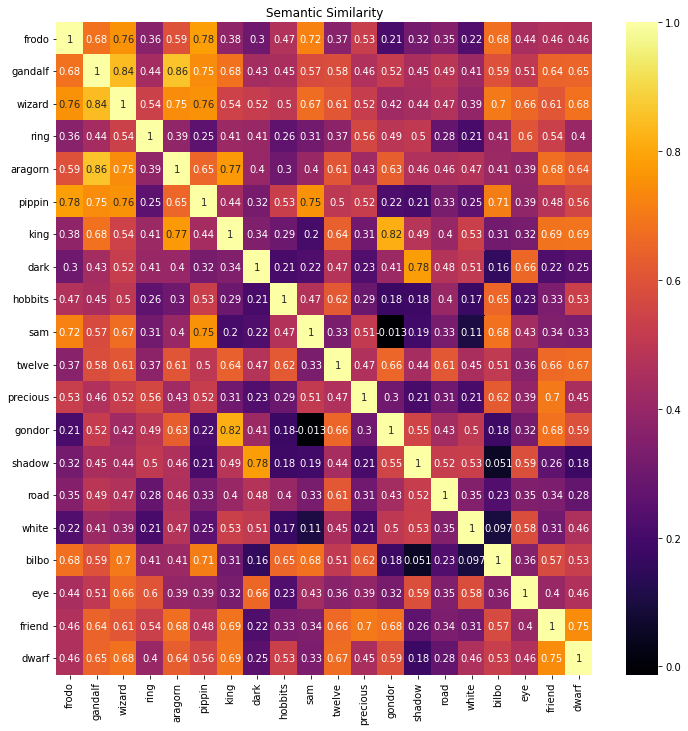

In [11]:
def plot_similarities(words):
    features = [np.array(model.wv[word]) for word in words]
    
    similarities = np.zeros((len(features), len(features)))
    for index1, feature1 in enumerate(features):
        for index2, feature2 in enumerate(features):
            similarities[index1, index2] = 1 - spatial.distance.cosine(feature1, feature2)

    fig, ax = plt.subplots(figsize=(12, 12))
    g = sns.heatmap(
        similarities,
        annot=True,
        xticklabels=words,
        yticklabels=words,
        cmap="inferno"
    )
    g.set_xticklabels(words, rotation=90)
    g.set_yticklabels(words, rotation=0)
    g.set_title("Semantic Similarity")
            
words = [
    "frodo",
    "gandalf",
    "wizard",
    "ring",
    "aragorn",
    "pippin",
    "king",
    "dark",
    "hobbits",
    "sam",
    "twelve",
    "precious",
    "gondor",
    "shadow",
    "road",
    "white",
    "bilbo",
    "eye",
    "friend",
    "dwarf"
]
plot_similarities(words)